# Week 2 Lab
This one aims to load the data into the database

In [1]:
import atoti as tt

Welcome to Atoti 0.8.7!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [2]:
session = tt.Session(
    user_content_storage=".content",
    port=9092,
     java_options=["-Xms1G", "-Xmx10G"]
)

In [3]:
db_name = "AdventureworksDWDemo"
db_user = "postgres"
db_password = "postgres"  # Update with your password
db_host = "localhost"  # Update if your DB is hosted elsewhere
db_port = "5432"

jdbc_url = f"jdbc:postgresql://{db_host}:{db_port}/{db_name}?user={db_user}&password={db_password}"

In [4]:
product_sales_table = session.read_sql(
    "SELECT * FROM factproductsales",
    keys=["transactionid"],
    table_name="ProductSales",
    url=jdbc_url,
)

In [5]:
customer_table = session.read_sql(
    "SELECT * FROM dimcustomer",
    keys=["customerid"],
    table_name="Customer",
    url=jdbc_url)

In [6]:
product_table = session.read_sql(
    "SELECT * FROM dimproduct",
    keys=["productkey"],
    table_name="Product",
    url=jdbc_url
)

In [7]:
sales_person_table = session.read_sql(
    "SELECT * FROM dimsalesperson",
    keys=["salespersonid"],
    table_name="SalesPerson",
    url=jdbc_url
)

In [8]:
stores_table = session.read_sql(
    "SELECT * FROM dimstores",
    keys=["storeid"],
    table_name="Stores",
    url=jdbc_url
)

In [9]:
product_sales_table.head()

,salesinvoicenumber,storeid,customerid,productid,salespersonid,quantity,salestotalcost,productactualcost,deviation
transactionid,,,,,,,,,
9,3,1,3,5,2,1.0,135.0,139.0,4.0
20,9,1,2,1,1,1.0,5.5,6.5,1.0
23,10,1,3,4,2,3.0,54.0,60.0,6.0
22,10,1,3,1,2,2.0,11.0,13.0,2.0
2,1,1,1,2,1,1.0,22.5,24.0,1.5


In [10]:
product_sales_table.join(customer_table, product_sales_table["customerid"] == customer_table["customerid"])

In [11]:
product_sales_table.join(product_table, product_sales_table["productid"] == product_table["productkey"])

In [12]:
product_sales_table.join(sales_person_table, product_sales_table["salespersonid"] == sales_person_table["salespersonid"])

In [13]:
product_sales_table.join(stores_table, product_sales_table["storeid"] == stores_table["storeid"])

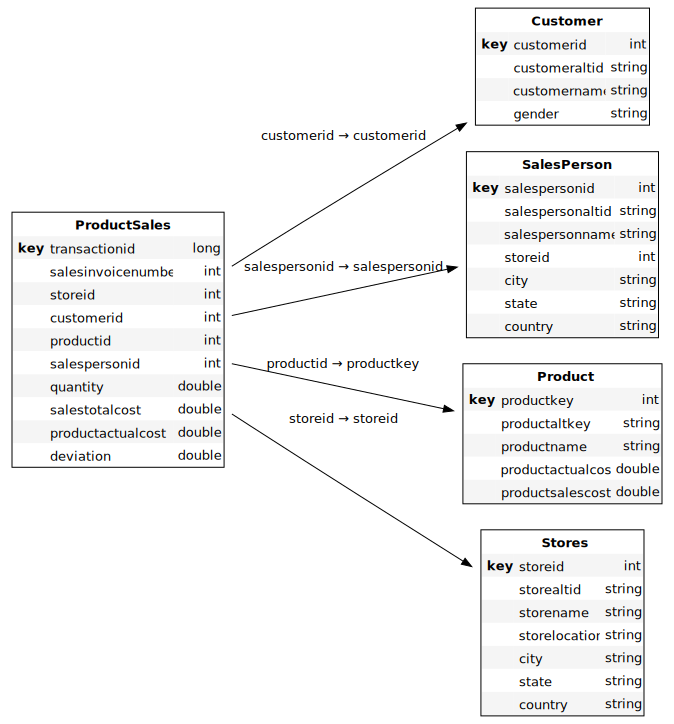

In [14]:
session.tables.schema

In [15]:
cube = session.create_cube(product_sales_table)

In [16]:
cube

In [17]:
hierarchies, levels, measures = cube.hierarchies, cube.levels, cube.measures

In [18]:
# original hierarchies
hierarchies

{('Stores', 'storename'): <atoti.hierarchy.Hierarchy object at 0x137810210>, ('Stores', 'state'): <atoti.hierarchy.Hierarchy object at 0x1378cb8d0>, ('Product', 'productname'): <atoti.hierarchy.Hierarchy object at 0x1378cb610>, ('SalesPerson', 'city'): <atoti.hierarchy.Hierarchy object at 0x1378cb150>, ('Product', 'productaltkey'): <atoti.hierarchy.Hierarchy object at 0x1378caf10>, ('SalesPerson', 'salespersonaltid'): <atoti.hierarchy.Hierarchy object at 0x1378cab90>, ('Stores', 'storealtid'): <atoti.hierarchy.Hierarchy object at 0x1378cacd0>, ('Stores', 'city'): <atoti.hierarchy.Hierarchy object at 0x1378caa10>, ('ProductSales', 'transactionid'): <atoti.hierarchy.Hierarchy object at 0x1378ca390>, ('Customer', 'customername'): <atoti.hierarchy.Hierarchy object at 0x1378c9f50>, ('SalesPerson', 'salespersonname'): <atoti.hierarchy.Hierarchy object at 0x1378c9f90>, ('SalesPerson', 'country'): <atoti.hierarchy.Hierarchy object at 0x1378c9cd0>, ('Customer', 'customeraltid'): <atoti.hierarchy.Hierarchy object at 0x1378c96d0>, ('Stores', 'storelocation'): <atoti.hierarchy.Hierarchy object at 0x1378c9250>, ('SalesPerson', 'state'): <atoti.hierarchy.Hierarchy object at 0x1378c9110>, ('Stores', 'country'): <atoti.hierarchy.Hierarchy object at 0x1378c8f50>, ('Customer', 'gender'): <atoti.hierarchy.Hierarchy object at 0x1378c8710>}

In [19]:
# original levels
levels

In [20]:
# original measures
measures

{'contributors.COUNT': <atoti.measure.Measure object at 0x137a3f350>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x137a3f3d0>, 'quantity.SUM': <atoti.measure.Measure object at 0x137a3f410>, 'quantity.MEAN': <atoti.measure.Measure object at 0x137a3f450>, 'productid.SUM': <atoti.measure.Measure object at 0x137a3f490>, 'productid.MEAN': <atoti.measure.Measure object at 0x137a3f4d0>, 'salespersonid.SUM': <atoti.measure.Measure object at 0x137a3f510>, 'salespersonid.MEAN': <atoti.measure.Measure object at 0x137a3f550>, 'salestotalcost.SUM': <atoti.measure.Measure object at 0x137a3f590>, 'salestotalcost.MEAN': <atoti.measure.Measure object at 0x137a3f5d0>, 'deviation.SUM': <atoti.measure.Measure object at 0x137a3f610>, 'deviation.MEAN': <atoti.measure.Measure object at 0x137a3f650>, 'salesinvoicenumber.SUM': <atoti.measure.Measure object at 0x137a3f690>, 'salesinvoicenumber.MEAN': <atoti.measure.Measure object at 0x137a3f6d0>, 'customerid.SUM': <atoti.measure.Measure object at 0x137a3f710>, 'customerid.MEAN': <atoti.measure.Measure object at 0x137a3f750>, 'productactualcost.SUM': <atoti.measure.Measure object at 0x137a3f790>, 'productactualcost.MEAN': <atoti.measure.Measure object at 0x137a3f7d0>, 'storeid.SUM': <atoti.measure.Measure object at 0x137a3f810>, 'storeid.MEAN': <atoti.measure.Measure object at 0x137a3f850>}

In [21]:
# dimensions
# Customer: CustomerName, Gender
# SalesPerson: SalesPersonName, City, State, Country
# Product: ProductName
# Store: StoreName, City, State

In [22]:
hierarchies["Customer"] = [levels["customername"], levels["gender"]]

In [23]:
hierarchies["Product"] = [levels["productname"]]

In [24]:
hierarchies["SalesPerson"] = [levels["salespersonname"], levels[('SalesPerson', 'city', 'city')], levels[('SalesPerson', 'state', 'state')], levels[('SalesPerson', 'country', 'country')]]

In [25]:
hierarchies["Stores"] = [levels[('Stores', 'storename', 'storename')], levels[('Stores', 'city', 'city')], levels[('Stores', 'state', 'state')], levels[('Stores', 'country', 'country')]]

In [26]:
hierarchies

{('Stores', 'storename'): <atoti.hierarchy.Hierarchy object at 0x1378c8250>, ('Stores', 'state'): <atoti.hierarchy.Hierarchy object at 0x137a6c650>, ('Stores', 'Stores'): <atoti.hierarchy.Hierarchy object at 0x137a6c050>, ('Customer', 'Customer'): <atoti.hierarchy.Hierarchy object at 0x137a6b890>, ('Product', 'productname'): <atoti.hierarchy.Hierarchy object at 0x137a6b2d0>, ('SalesPerson', 'city'): <atoti.hierarchy.Hierarchy object at 0x137a6ae90>, ('Product', 'productaltkey'): <atoti.hierarchy.Hierarchy object at 0x137a6add0>, ('SalesPerson', 'salespersonaltid'): <atoti.hierarchy.Hierarchy object at 0x137a6ac10>, ('Stores', 'storealtid'): <atoti.hierarchy.Hierarchy object at 0x137a69290>, ('Stores', 'city'): <atoti.hierarchy.Hierarchy object at 0x137a69650>, ('ProductSales', 'transactionid'): <atoti.hierarchy.Hierarchy object at 0x137a69310>, ('Customer', 'customername'): <atoti.hierarchy.Hierarchy object at 0x137a6a2d0>, ('SalesPerson', 'SalesPerson'): <atoti.hierarchy.Hierarchy object at 0x137a50910>, ('SalesPerson', 'salespersonname'): <atoti.hierarchy.Hierarchy object at 0x137a501d0>, ('SalesPerson', 'country'): <atoti.hierarchy.Hierarchy object at 0x137a50710>, ('Product', 'Product'): <atoti.hierarchy.Hierarchy object at 0x137a51c90>, ('Customer', 'customeraltid'): <atoti.hierarchy.Hierarchy object at 0x137a3e250>, ('Stores', 'storelocation'): <atoti.hierarchy.Hierarchy object at 0x137a3df90>, ('SalesPerson', 'state'): <atoti.hierarchy.Hierarchy object at 0x137a4a310>, ('Stores', 'country'): <atoti.hierarchy.Hierarchy object at 0x137a48c90>, ('Customer', 'gender'): <atoti.hierarchy.Hierarchy object at 0x137a4a190>}

In [27]:
# clean customer
del hierarchies[('Customer', 'customeraltid')]
del hierarchies[('Customer', 'customername')]
del hierarchies[('Customer', 'gender')]

In [28]:
# clean product
del hierarchies[('Product', 'productname')]
del hierarchies[('Product', 'productaltkey')]

In [29]:
# clean salesperson
del hierarchies[('SalesPerson', 'city')]
del hierarchies[('SalesPerson', 'salespersonname')]
del hierarchies[('SalesPerson', 'country')]
del hierarchies[('SalesPerson', 'state')]
del hierarchies[('SalesPerson', 'salespersonaltid')]

In [30]:
# clean stores
del hierarchies[('Stores', 'storename')]
del hierarchies[('Stores', 'state')]
del hierarchies[('Stores', 'country')]
del hierarchies[('Stores', 'storealtid')]
del hierarchies[('Stores', 'city')]

In [31]:
# clean product sales
del hierarchies[('ProductSales', 'transactionid')]

In [32]:
hierarchies

{('SalesPerson', 'SalesPerson'): <atoti.hierarchy.Hierarchy object at 0x105869dd0>, ('Stores', 'Stores'): <atoti.hierarchy.Hierarchy object at 0x137a868d0>, ('Product', 'Product'): <atoti.hierarchy.Hierarchy object at 0x137a84450>, ('Customer', 'Customer'): <atoti.hierarchy.Hierarchy object at 0x137a84390>, ('Stores', 'storelocation'): <atoti.hierarchy.Hierarchy object at 0x137a87910>}

In [33]:
# clean measures
del measures["contributors.COUNT"]
del measures["customerid.MEAN"]
del measures["customerid.SUM"]
del measures["deviation.MEAN"]
del measures["deviation.SUM"]
del measures["productactualcost.MEAN"]
del measures["productid.MEAN"]
del measures["productid.SUM"]
del measures["salesinvoicenumber.MEAN"]
del measures["salesinvoicenumber.SUM"]
del measures["salespersonid.MEAN"]
del measures["salespersonid.SUM"]
del measures["storeid.MEAN"]
del measures["storeid.SUM"]
del measures["salestotalcost.MEAN"]
del measures["quantity.MEAN"]

In [34]:
measures

{'update.TIMESTAMP': <atoti.measure.Measure object at 0x134dfee90>, 'quantity.SUM': <atoti.measure.Measure object at 0x13781d090>, 'salestotalcost.SUM': <atoti.measure.Measure object at 0x134dfeed0>, 'productactualcost.SUM': <atoti.measure.Measure object at 0x134dfed50>}

In [35]:
cube.query(measures["quantity.SUM"], levels=[levels[('Stores', 'Stores', 'city')]])

,,quantity.SUM
storename,city,
X-Mart,Ahmedabad,43.00
